In [10]:
# coding=utf-8
import pickle
from pygame import freetype
import cv2
import Augmentor
import string
import random
import os
import argparse
import yaml

from util.font import get_font
from util.draw import draw_text, cut_text
from util.perspective import perspective
from util.distortion import random_distortion, get_bbs
from util.color import *
from util.waving import waving
from util.noise import create_dots, create_lines, create_arcs
from config import CHAR_TYPES

random.random()

0.3961319616607101

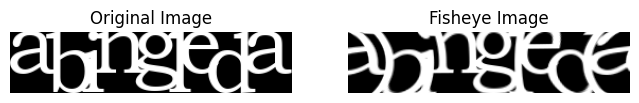

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 加载图像
image = cv2.imread('/home/kody/Desktop/The_Imitation_Game/sample.png')
rows, cols = image.shape[:2]

# 创建鱼眼效果的映射
map_x = np.zeros((rows, cols), np.float32)
map_y = np.zeros((rows, cols), np.float32)

# 定义鱼眼效果的参数
scale = 0.1  # 控制鱼眼效果的强度

for i in range(rows):
    for j in range(cols):
        # 将图像坐标归一化到 [-1, 1] 范围
        x = (j - cols / 2) / (cols / 2)
        y = (i - rows / 2) / (rows / 2)

        # 计算鱼眼效果的半径
        r = np.sqrt(x ** 2 + y ** 2)
        theta = np.arctan2(y, x)

        # 应用鱼眼效果（非线性映射）
        r = r * (1 - scale * r ** 2)

        # 将极坐标转换回笛卡尔坐标
        x_new = r * np.cos(theta)
        y_new = r * np.sin(theta)

        # 将坐标映射回图像范围
        map_x[i, j] = (x_new + 1) * (cols / 2)
        map_y[i, j] = (y_new + 1) * (rows / 2)

# 使用 remap 函数应用鱼眼效果
fisheye_image = cv2.remap(image, map_x, map_y, cv2.INTER_LINEAR)

# 显示效果
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.subplot(122)
plt.imshow(cv2.cvtColor(fisheye_image, cv2.COLOR_BGR2RGB))
plt.title('Fisheye Image')
plt.axis('off')
plt.show()



In [12]:
import string
a  = "sdasdASD"
print(a.lower())

sdasdasd


In [13]:
import yaml

with open("新配置模式.yaml","rb") as f:
    data = yaml.load(f,Loader=yaml.FullLoader)
    print(data)

{'mode': 'go', 'captcha': {'number': 2000, 'length': {'min': 4, 'max': 5}}, 'image': {'width': 160, 'height': 70}, 'font': {'size': {'min': 70, 'max': 70}, 'name': 'ofl/notosansmono/NotoSansMono[wdth,wght].ttf', 'antialiased': True, 'origin': False, 'underline_prob': 0, 'strong': {'prob': 0.4, 'plus_prob': 1, 'value': 1}, 'oblique_prob': 0.1}, 'curve': {'rate': {'min': 0, 'max': 0}, 'rotation': {'min': 0, 'max': 0}}, 'random': {'curve': {'min': -30, 'max': 30}, 'dis': {'min': -35, 'max': 20}, 'rotation': {'min': -50, 'max': 50}}, 'transform': {'rotate': [0, 0], 'zoom': [0.0, 1], 'shear': [0, 0], 'perspect': [0.0, 0], 'padding': {'min': 0, 'max': 10}}, 'distort': {'p': 0, 'grid_size': 7, 'magnitude': 5}, 'visual': {'waving': False, 'line': False, 'dots': False, 'arc': False, 'bg': {'enabled': True, 'dir': 'bg/apple', 'color': 'white'}}, 'color': {'font': [0, 0, 0]}, 'char_type': 'mixU'}


In [14]:
import cv2
import numpy as np
img = cv2.imread('/home/kody/Desktop/The_Imitation_Game/sample.png', cv2.IMREAD_GRAYSCALE)

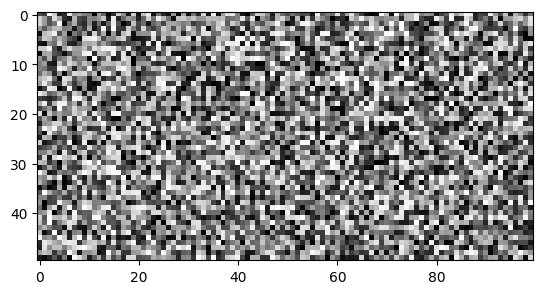

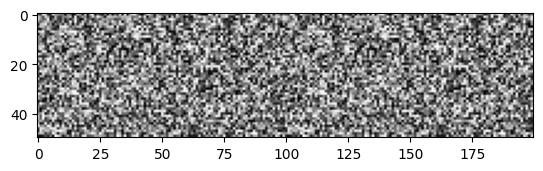

In [15]:
img = np.random.randint(0, 256, size=(50, 100), dtype=np.uint8)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()
img2 = np.hstack([img, img])
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)
plt.show()

In [21]:
def showImageUsePlt(img):
    # 转换为RGB图像
    img = cv2.cvtColor(img, cv2.COLOR_BGRA2RGBA)
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

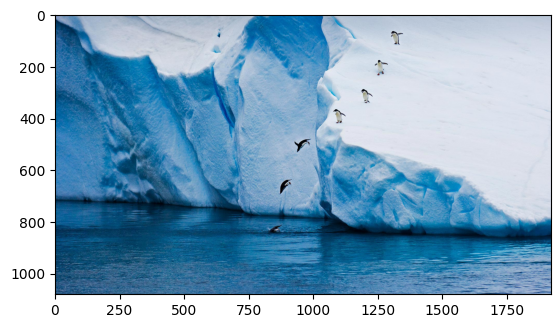

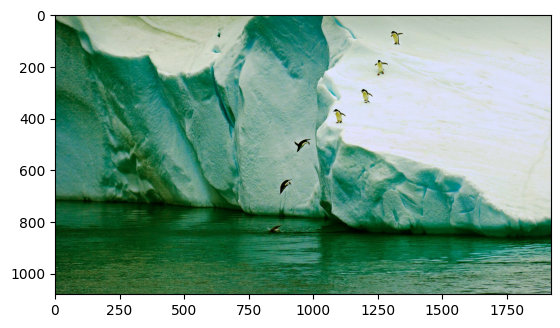

In [27]:
img = cv2.imread('image.png', cv2.IMREAD_COLOR)
showImageUsePlt(img)
b,g,r = cv2.split(img)
b = cv2.equalizeHist(b) # 使得蓝色通道的直方图均衡化
showImageUsePlt(cv2.merge([b,g,r]))

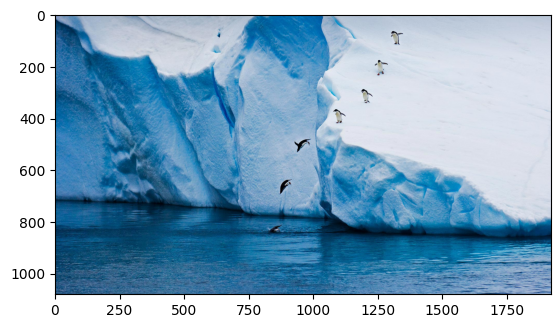

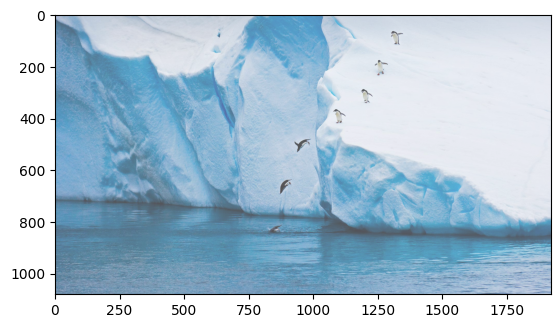

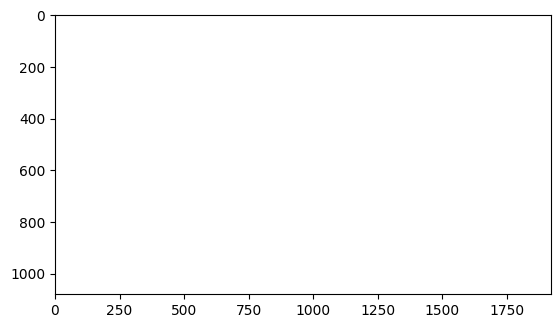

In [29]:
img = cv2.imread('image.png', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)
b,g,r,a = cv2.split(img)
a[:,:]=172
img1 = cv2.merge([b,g,r,a])
a[:,:]=0
img2 = cv2.merge([b,g,r,a])
showImageUsePlt(img)
showImageUsePlt(img1)
showImageUsePlt(img2)

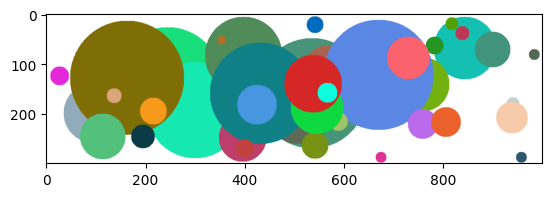

In [30]:
img = np.ones((300, 1000, 3), dtype=np.uint8) * 255
for i in range(50):
    x = np.random.randint(10, 990)
    y = np.random.randint(10, 290)
    max_radius = min(x, y, 1000 - x, 300 - y)
    radius = np.random.randint(9, max_radius)
    color = (np.random.randint(0, 256), np.random.randint(0, 256), np.random.randint(0, 256))
    cv2.circle(img, (x, y), radius, color, -1)
showImageUsePlt(img)

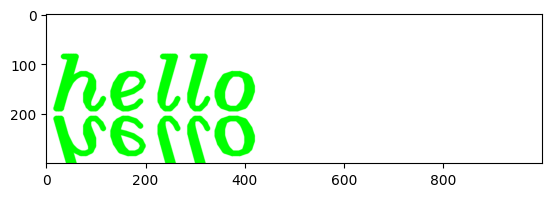

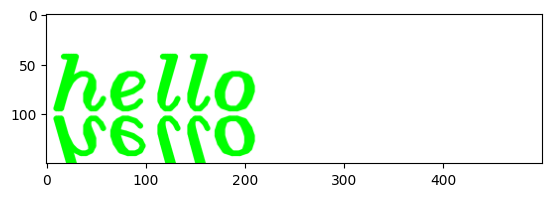

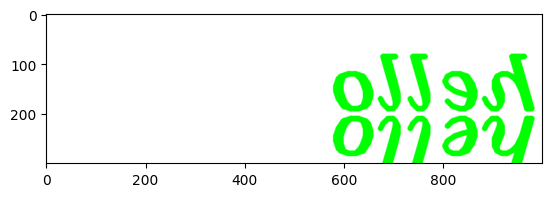

In [34]:
img = np.ones((300, 1000, 3), dtype=np.uint8) * 255
fontStyle = cv2.FONT_HERSHEY_TRIPLEX+cv2.FONT_ITALIC
cv2.putText(img, 'hello', (10, 210), fontStyle, 5, (0, 255, 0), 10, cv2.LINE_AA, True)
cv2.putText(img, 'hello', (10, 190), fontStyle, 5, (0, 255, 0), 10, cv2.LINE_AA)
showImageUsePlt(img)
img2 = cv2.resize(img, None, fx=0.5, fy=0.5)
showImageUsePlt(img2)
img3 = cv2.flip(img, 1)
showImageUsePlt(img3)

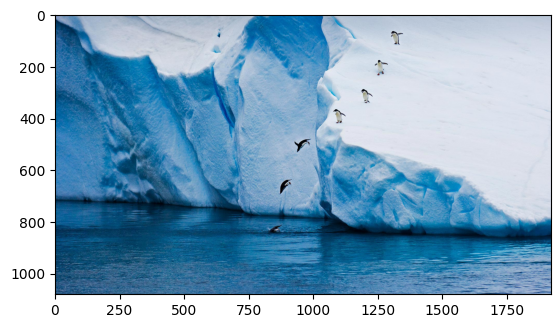

In [35]:
img = cv2.imread('image.png', cv2.IMREAD_COLOR)
M = np.float32([[1, 0, 1000], [0, 1, 1000]])
img2 = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
showImageUsePlt(img)